# CS229 Problem Set 1: Supervised Learning
Coding Solutions

## Task 1: Logistic regression

GOAL: Implement the Newton method on binary classification

In [2]:
import numpy as np

# Step 1: Read the data from the files and store them in NumPy arrays

# Read the 'logistic_x' file
with open('logistic_x.txt', 'r') as f:
    lines = f.readlines()
    data_x = np.array([[float(val) for val in line.strip().split()] for line in lines])

# Read the 'y' file
with open('logistic_y.txt', 'r') as f:
    lines = f.readlines()
    data_y = np.array([float(val) for val in lines])

print("Data x:\n", data_x)
print("Data y:\n", data_y)

Data x:
 [[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]
 [ 1.9458584  -2.0443278 ]
 [ 2.1075153  -2.1256684 ]
 [ 2.070373   -2.4634101 ]
 [ 0.86864964 -2.4119348 ]
 [ 1.8006594  -2.7739689 ]
 [ 3.1283787  -3.4452432 ]
 [ 3.0947429  -3.6446145 ]
 [ 2.9086652  -4.0065037 ]
 [ 2.6770338  -3.0198592 ]
 [ 2.7458671  -2.7100561 ]
 [ 4.1714647  -3.4622482 ]
 [ 3.931322   -2.1099044 ]
 [ 4.378687   -2.3804743 ]
 [ 4.8016565  -3.3803344 ]
 [ 4.166105   -2.8138844 ]
 [ 2.4670141  -1.6108444 ]
 [ 3.4826743  -1.5533872 ]
 [ 3.3652482  -1.8164936 ]
 [ 2.8772788  -1.8511689 ]
 [ 3.1090444  -1.6384946 ]
 [ 2.2183701   0.07427956]
 [ 1.9949873   0.16268659]
 [ 2.9500308   0.01687302]
 [ 2.0216009   0.17227387]
 [ 2.0486921  -0.63581041]
 [ 0.87548563 -0.54586168]
 [ 0.57079941 -0.03327866]
 [ 1.4266468  -0.75288337]
 [ 0.72265633 -0.8669193 ]
 [ 0.95346198 -1.4896956 ]
 [ 4.8333333   0.07017544]
 [ 4.3070175   1.41

First, we try to directly use sklearn to solve this regression:

In [44]:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the model to the data
logistic_regression_model.fit(data_x, data_y)

# Get the coefficients and intercept
coef = logistic_regression_model.coef_
intercept = logistic_regression_model.intercept_

print("Coefficients: ", coef)
print("Intercept: ", intercept)

Coefficients:  [[0.72363157 1.09850731]]
Intercept:  [-2.49723171]


Now, we need to implement the algorithm ourselves

In [61]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calculate_gradient(X, y, weights):
    # Calculate the gradient of the log-likelihood function with respect to the weights
    m = len(y)
    
    gradient = np.dot(X.T, (sigmoid(np.dot(weights.T, np.dot(y, X))) * y - y)) / m
    return gradient

def calculate_hessian(X, y, weights):
    # Calculate the Hessian matrix of the log-likelihood function with respect to the weights
    m, n = X.shape
    diagn = []
    
    for i in range(m):
        predictions = sigmoid(y[i] * np.dot(weights, X[i, :]))
        diagonal_elements = predictions * (1 - predictions)
        diagn.append(diagonal_elements)

    hessian_diag = np.diag(diagn)

    hessian = np.dot(X.T, hessian_diag).dot(X)

    print(hessian)
    return hessian

def calc_loss(X, y, weights):
    m, n = X.shape
    ret = np.log(1 + np.exp(-np.dot(weights.T, np.dot(y, X))))
    return ret

def newton_logistic_regression(X, y, max_iterations=100, tolerance=1e-6):
    # Step 1: Initialize the model's parameters (weights and bias)
    num_features = X.shape[1]
    weights = np.zeros(num_features)

    for i in range(max_iterations):
        print(f"Iteration: {i + 1}")
        # Step 2: Calculate the gradient and Hessian
        gradient = calculate_gradient(X, y, weights)
        hessian = calculate_hessian(X, y, weights)

        # Step 3: Update the parameters using the Newton method update formula
        weights_change = np.dot(np.linalg.inv(hessian), gradient)
        weights -= weights_change

        loss = calc_loss(X, y, weights)
        print(f"Loss: {loss}")
        print(f"Weights: {weights}")
        # Step 4: Check for convergence
        if loss < tolerance:
            break

    return weights

# Add bias term (x0) to the data
X_with_bias = np.column_stack((np.ones(len(data_x)), data_x))

# Perform Newton-based logistic regression
weights = newton_logistic_regression(X_with_bias, data_y)

print("Final Weights:", weights)

Iteration: 1
[[ 24.75        97.10155981  -8.65500126]
 [ 97.10155981 472.21469823 -17.98935367]
 [ -8.65500126 -17.98935367  79.93290546]]
Loss: 0.2813857604961958
Weights: [-0.01525089  0.00439492  0.00627896]
Iteration: 2
[[ 24.74858086  97.09580263  -8.65451609]
 [ 97.09580263 472.18494712 -17.99132706]
 [ -8.65451609 -17.99132706  79.9255679 ]]
Loss: 0.171614641144187
Weights: [-0.02273258  0.00655096  0.00935931]
Iteration: 3
[[ 24.7468472   97.08876957  -8.65392334]
 [ 97.08876957 472.14860312 -17.99373722]
 [ -8.65392334 -17.99373722  79.91660444]]
Loss: 0.12339071224650841
Weights: [-0.02754366  0.00793741  0.01134015]
Iteration: 4
[[ 24.74537181  97.08278428  -8.65341884]
 [ 97.08278428 472.11767393 -17.99578782]
 [ -8.65341884 -17.99578782  79.9089765 ]]
Loss: 0.09635752326304099
Weights: [-0.0310855   0.00895809  0.01279844]
Iteration: 5
[[ 24.74410534  97.07764664  -8.65298576]
 [ 97.07764664 472.09112524 -17.99754765]
 [ -8.65298576 -17.99754765  79.90242898]]
Loss: 0.079

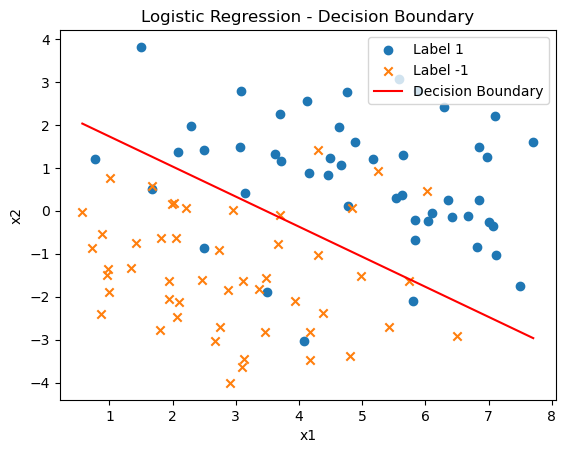

In [62]:
import matplotlib.pyplot as plt

# Assuming you have the following variables from previous steps:
# X_with_bias: Training data with bias term (including x0=1)
# data_y: Training labels (1 or -1)
# weights: Learned weights from logistic regression

# Separate positive and negative examples
positive_examples = X_with_bias[data_y == 1]
negative_examples = X_with_bias[data_y == -1]

# Plot the training data
plt.scatter(positive_examples[:, 1], positive_examples[:, 2], marker='o', label='Label 1')
plt.scatter(negative_examples[:, 1], negative_examples[:, 2], marker='x', label='Label -1')

# Generate x-coordinates for the decision boundary line
x_boundary = np.linspace(np.min(X_with_bias[:, 1]), np.max(X_with_bias[:, 1]), 100)

# Calculate y-coordinates for the decision boundary line using the learned weights
# The decision boundary is where hθ(x) = 0.5, i.e., θ^T * X = 0
y_boundary = (-weights[0] - weights[1] * x_boundary) / weights[2]

# Plot the decision boundary line
plt.plot(x_boundary, y_boundary, color='r', label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression - Decision Boundary')
plt.legend()
plt.show()

## Task 2: Regression for denoising quasar spextra

- Preprocess the data first

[ 1.46  -0.057  1.37   2.09   1.15  -0.182  0.351  1.57   1.97   0.201
 -1.12   1.92   1.08   0.76   1.49   0.655  1.86   1.03   0.965  1.07
  0.946  0.788  1.73   1.56   1.14   1.16   0.556  0.434  0.291  0.94
  1.36   1.39   0.634  1.08   0.961  1.89   1.32   2.1    0.47   1.03
  1.4    0.513  0.398  1.03   1.18   1.55   0.971  0.497  1.2    0.517
  0.86   1.46   1.36   1.57   1.29   0.872  0.433  0.246  1.47   1.58
  4.     6.6    6.21   1.63  10.3    9.49  -0.902  7.22   2.96   5.79
  1.61  10.8   -0.068  2.44   7.45  -2.41   4.45   7.21   1.54   0.855
 -0.274  1.68   2.32   0.986  1.69   1.17   1.31   1.17   0.892  1.32
  1.66   1.3    0.867  1.56   0.821  1.88   1.35   1.24   1.92   0.989
  1.25   1.32   1.51   0.989  1.15   1.09   1.03   1.32   0.807  0.873
  0.796  1.26   0.882  0.823  1.19   1.15   0.891  1.17   0.866  1.05
  1.07   0.901  1.06   0.886  1.06   0.901  0.968  1.05   0.98   0.822
  1.01   1.16   1.22   0.894  1.03   1.29   1.08   0.236  1.02   0.816
  1.11   1.04

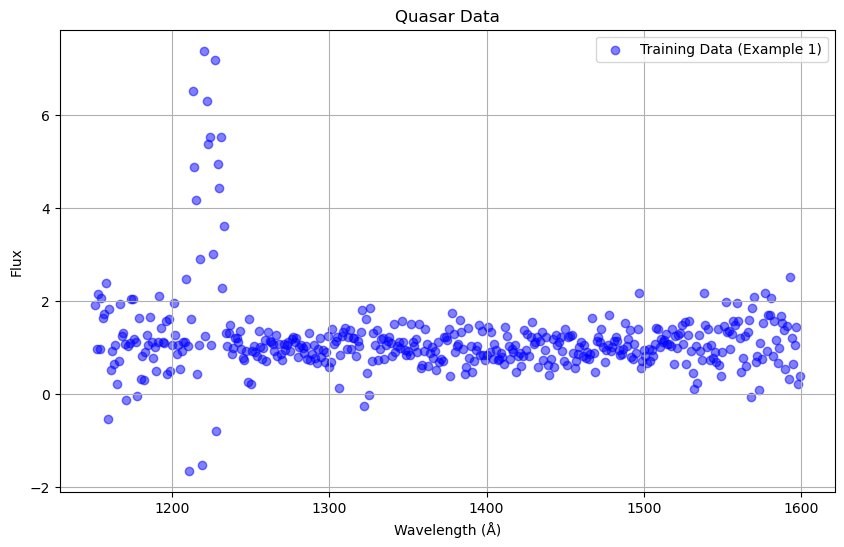

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    wavelengths, fluxes = [], []
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # The first line writes the wave length
        data = lines[0].strip().split(',')
        wavelengths.append(list(map(float, data[1:])))

        # remaining lines writes the flux data, and in (b), we need only the second line of data
        for line in lines[1:]:
            data = line.strip().split(',')
            fluxes.append(list(map(float, data[1:])))
    
    return np.array(wavelengths), np.array(fluxes)

# Assuming you have the 'quasar_train.csv' and 'quasar_test.csv' files in the same directory
train_file_path = 'quasar_train.csv'
test_file_path = 'quasar_test.csv'

# Load the data from the CSV files
train_wavelengths, train_fluxes = load_data(train_file_path)
test_wavelengths, test_fluxes = load_data(test_file_path)

print("Shape of wavelengths: ", train_wavelengths.shape)
print("Shape of fluxs: ", test_fluxes.shape)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(train_wavelengths, train_fluxes[0], label='Training Data (Example 1)', color='blue', alpha=0.5)
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.title('Quasar Data')
plt.legend()
plt.grid(True)
plt.show()


- Implement the least square linear regression to fit a straight line

Attention: We need to set $x^{(i)}_0 = 1$ before we fit the model

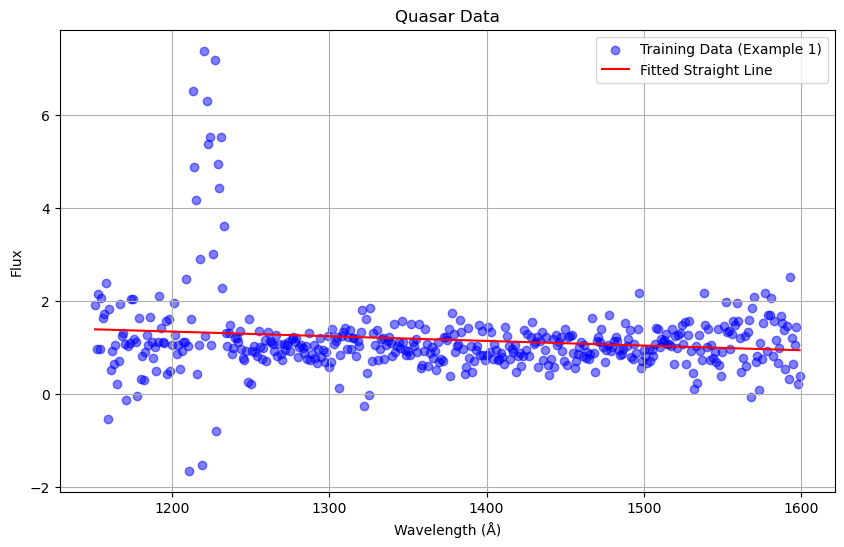

In [46]:
def add_intercept(X):
    return np.column_stack(([1]*len(X), X))

def ls_fit(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

def ls_fig(wavelengths, raw_y, est_y):
    # Plot the data and the straight line
    plt.figure(figsize=(10, 6))
    plt.scatter(wavelengths, raw_y, label='Training Data (Example 1)', color='blue', alpha=0.5)
    plt.plot(wavelengths, est_y, label='Fitted Straight Line', color='red')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux')
    plt.title('Quasar Data')
    plt.legend()
    plt.grid(True)
    plt.show()

wavelengths_intercepted = add_intercept(train_wavelengths[0])
theta = ls_fit(wavelengths_intercepted, train_fluxes[0])
y_hat = wavelengths_intercepted.dot(theta)

ls_fig(train_wavelengths[0], train_fluxes[0], y_hat)


- Now we implement the locally weighted linear regression

Note: For the weight function, the input X must be a vector (1-D).

Since LWR is a non-parametric algorithm, we cannot separate the param $\theta$ from the training set. Instead, $\hat{y}$ should be predicted directly accroding to the given params 

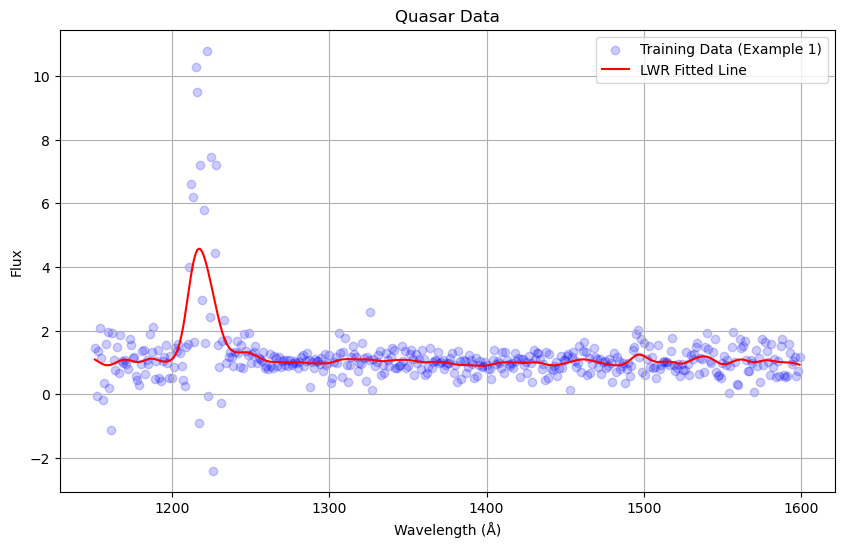

In [71]:
def weight_mat(x_query, X, tau):
    vec = []
    for i in range(len(X)):
        w = np.exp(-(1/(2*tau*tau))*(x_query - X[i])**2)
        vec.append(w)
    
    return np.diag(vec)

def lwr_fit(x, y, tau = 5):
    spectrum = []

    x_inte = add_intercept(x)
    for i in range(len(x)):
        
        W = weight_mat(x[i], x, tau)
        theta = np.linalg.inv(x_inte.T.dot(W).dot(x_inte)).dot(x_inte.T).dot(W).dot(y)

        y_hat = theta.T.dot(x_inte[i])
        
        spectrum.append(y_hat)

    return spectrum


def lwr_fig(wavelengths, raw_y, est_y):
    # Plot the data and the straight line
    plt.figure(figsize=(10, 6))
    plt.scatter(wavelengths, raw_y, label='Training Data (Example 1)', color='blue', alpha=0.2)
    plt.plot(wavelengths, est_y, label='LWR Fitted Line', color='red')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux')
    plt.title('Quasar Data')
    plt.legend()
    plt.grid(True)
    plt.show()

spec = lwr_fit(test_wavelengths[0], test_fluxes[0])
lwr_fig(test_wavelengths[0], test_fluxes[0], spec)

- Now we successfully implemented the LWR algorithm, now we need to test $\tau = 1, 10, 100, 1000$ and illustrate the regression shape

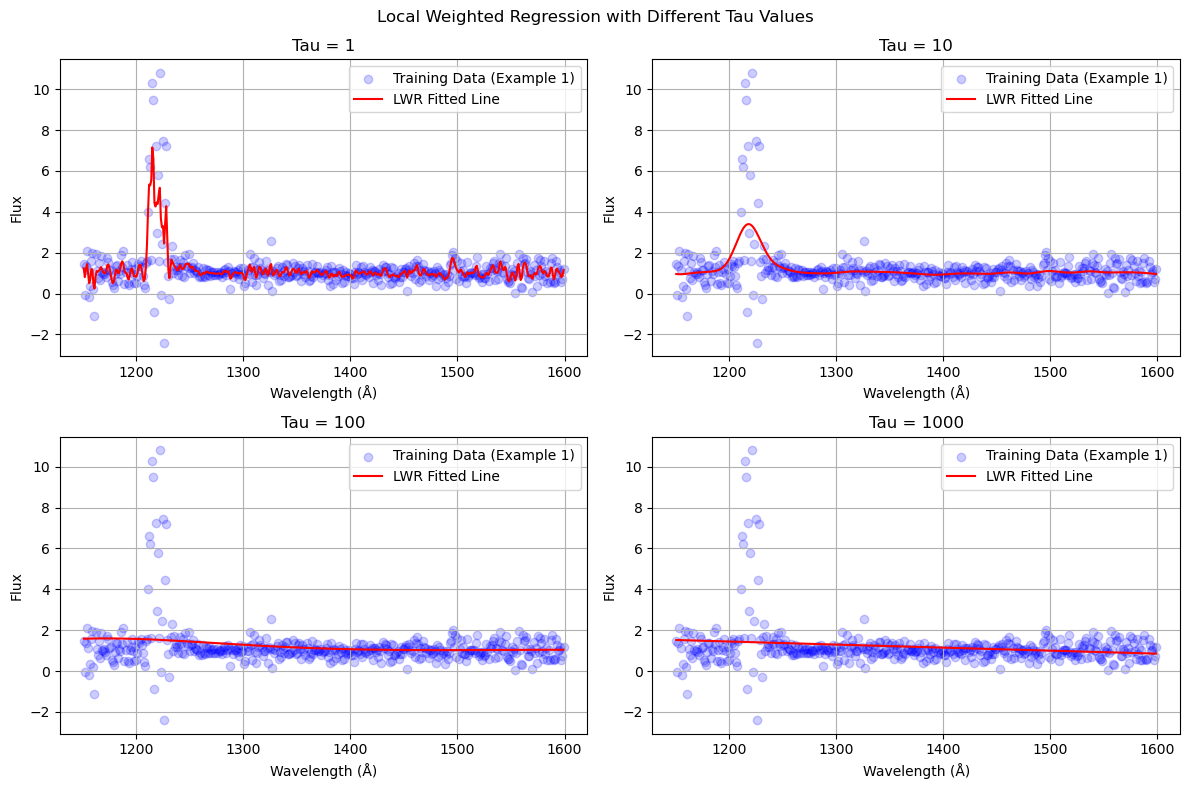

In [72]:
def lwr_fig_subplot(ax, wavelengths, raw_y, est_y, title):
    ax.scatter(wavelengths, raw_y, label='Training Data (Example 1)', color='blue', alpha=0.2)
    ax.plot(wavelengths, est_y, label='LWR Fitted Line', color='red')
    ax.set_xlabel('Wavelength (Å)')
    ax.set_ylabel('Flux')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

# Test different tau values and create subplots
tau_values = [1, 10, 100, 1000]
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Local Weighted Regression with Different Tau Values')

for i, tau in enumerate(tau_values):
    spec = lwr_fit(test_wavelengths[0], test_fluxes[0], tau=tau)
    lwr_fig_subplot(axs[i // 2, i % 2], test_wavelengths[0], test_fluxes[0], spec, f'Tau = {tau}')

plt.tight_layout()
plt.show()

In [74]:
def smooth_data(raw, wavelengths):
    ret = []
    for each in raw:
        ret.append(lwr_fit(wavelengths, each))
    
    return np.array(ret)

smooth_train, smooth_test = [smooth_data(raw, test_wavelengths[0]) for raw in [train_fluxes, test_fluxes]]